# **Neural Networks & Intelligent Systems**
## **ECE NTUA, Flow Y, 9th Semester, 2021-2022**
### *Lab 2: Unupervised Learning (Recommendation System)*

#### Team 20

# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2021

**Θα βρείτε το παρόν σε μορφή jupyter notebook ως συνημμένο στο τέλος της εκφώνησης.**


In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 15.7 MB 7.5 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 8.4 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


     |████████████████████████████████| 1.5 MB 7.4 MB/s            
     |████████████████████████████████| 749 kB 52.5 MB/s            
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

In [ ]:
print(df_data_1.shape)
print("First movie:")
print(df_data_1.iloc[0,:])

(22302, 6)
First movie:
0                                               975900
1                                                    1
2                                       Ghosts of Mars
3    "Thriller",  "Science Fiction",  "Horror",  "A...
4    0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
5    Set in the second half of the 22nd century, th...
Name: 0, dtype: object


Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 20

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe corpus_df που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [ ]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['The Ghost of Slumber Mountain']
['"Short Film",  "Science Fiction",  "Silent film",  "Indie",  "Black-and-white"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Προεπεξεργασία

Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών. 

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτρήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf_plain = vectorizer.transform(corpus).toarray()

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.

Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.

In [ ]:
print(corpus_tf_idf_plain.shape)
print(vectorizer.vocabulary_)
print(corpus_tf_idf_plain)
print(corpus[2])

(5000, 48531)
{'set': 38500, 'in': 20944, 'the': 43323, 'year': 48037, '2026': 377, 'metropolis': 27416, 'takes': 42650, 'place': 32504, 'dystopian': 13424, 'society': 40155, 'where': 47252, 'wealthy': 47040, 'intellectuals': 21559, 'rule': 36950, 'from': 16773, 'vast': 46006, 'tower': 44094, 'complexes': 9006, 'oppressing': 30504, 'workers': 47720, 'who': 47329, 'live': 25122, 'depths': 11505, 'below': 4546, 'them': 43349, 'film': 15742, 'follows': 16258, 'freder': 16636, 'son': 40293, 'of': 30252, 'master': 26668, 'city': 8234, 'joh': 22553, 'fredersen': 16643, 'while': 47266, 'idling': 20606, 'away': 3519, 'his': 19791, 'leisure': 24660, 'time': 43698, 'pleasure': 32625, 'garden': 17161, 'encounters': 14103, 'young': 48174, 'woman': 47637, 'named': 29000, 'maria': 26412, 'has': 19087, 'brought': 6102, 'group': 18347, 'worker': 47719, 'children': 7924, 'to': 43824, 'see': 38213, 'privileged': 33458, 'lifestyle': 24905, 'led': 24584, 'by': 6508, 'rich': 36267, 'and': 2168, 'are': 2737

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


In [ ]:
import re
from scipy import spatial

def cos_sim(a,b):
  return spatial.distance.cosine(a,b)

def content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain):
  cosine_sim_list = []
  for i in range(len(corpus_tf_idf_plain)):
        cosine_sim_list.append(float(cos_sim([corpus_tf_idf_plain[target_movie]], [corpus_tf_idf_plain[i]])) )
  cosine_sim_sorted = sorted(cosine_sim_list)
  cosine_sim_rev_list = np.argsort(cosine_sim_list)
  recommendations = cosine_sim_rev_list[1:max_recommendations+1]
  print("Target Movie")
  print("movie_id:", target_movie)
  print("movie_title:", titles[target_movie])
  print("movie_plot:", corpus[target_movie])
  print("movie_categories:", categories[target_movie])
  print()
  print("Recommendations")
  for i,rec_movie in enumerate(recommendations):
      print(str(i+1) + ".")
      print("movie_id:", rec_movie)
      print("movie_title:", titles[rec_movie])
      print("movie_plot:", corpus[rec_movie])
      print("movie_categories:", categories[rec_movie])
      print()

target_movie = 5
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)


target_movie = 10
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)




Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

Παρατηρούμε ότι η Target Movie μας και στις δύο περιπτώσεις δεν έχει πολλά κοινά χαρακτηριστικά-κατηγορίες με τις προτεινόμενες, από το σύστημα, ταινίες. Γεγονός που αφήνει περιθώριο για αισθητή βελτιστοποίηση.

## Βελτιστοποίηση του TfidfVectorizer

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. 

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




Για την βελτιστοποιηση του συστηματος μας, πρεπει να επεξεργαστουμε τα δεδομενα μας. Πιο συγκεκριμενα, μετατρεπουμε, αρχικα, ολες τις λεξεις σε πεζες και διαγραφουμε αυτες που επαναλαμβανονται συχνα στην αγγλικη γλωσσα και εμφανιζονται πολλες φορες σε ολες τις συνοψεις ταινιων καθως αυξανουν την τιμη της ομοιοτητας ταινιων χωρις καποια πραγματικη συσχετιση. Ακομη, θα διαγραψουμε τα σημεια στιξης και τελος θα εφαρμοσουμε stemming και lemmatizing για να ομαδοποιηθουν οι παραγωγες λεξεις.

In [ ]:
import nltk

nltk.download('punkt')
words = []
for doc in corpus:
    words += nltk.word_tokenize(doc.lower())
print("Total words in corpus:\t", len(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Total words in corpus:	 1740757


In [ ]:
# nltk.download('all')   bug fix

In [ ]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('rslp')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

def small(words):
    filtered_words = [word for word in words if len(word) > 2]
    return filtered_words

def preprocess_document(document, stemming=True):
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]
    filtered_words = thorough_filter(filtered_words)
    filtered_words = small(filtered_words)
    # stemming / lemmatizing
    if stemming:
        words = [PorterStemmer().stem(word) for word in filtered_words]
    else:
        words = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
    return " ".join(words)

preprocessed_stem_documents = [preprocess_document(doc,True) for doc in corpus]
preprocessed_lem_documents = [preprocess_document(doc,False) for doc in corpus]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
def partial_preprocessed_document(document):
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in list(string.punctuation)]
    filtered_words = thorough_filter(filtered_words)
    filtered_words = small(filtered_words)
    return " ".join(filtered_words)

partial_preprocessed_documents = [partial_preprocessed_document(doc) for doc in corpus]

In [ ]:
import joblib

joblib.dump(preprocessed_stem_documents, 'preprocessed_stem_corpus.pkl')
joblib.dump(preprocessed_lem_documents, 'preprocessed_lem_corpus.pkl')

joblib.dump(partial_preprocessed_documents, 'partial_preprocessed_corpus.pkl')  


In [ ]:
import joblib

preprocessed_stem_corpus = joblib.load('preprocessed_stem_corpus.pkl')
preprocessed_lem_corpus = joblib.load('preprocessed_lem_corpus.pkl')

partial_preprocessed_corpus = joblib.load('partial_preprocessed_corpus.pkl')

In [ ]:
#  print(preprocessed_lem_corpus[1])

# # print(partial_preprocessed_corpus[1])

### Τελος, για την βελτιστοποιηση του dataset μας καλουμε τη συναρτηση TdifVectorizer. Οσον αφορα τις παραμετρους max_df και min_df θα δοκιμασουμε διαφορες τιμες ωστε να μειωσουμε τις διαστασεις του vector και να λαμβανουμε καλυτερα αποτελεσματα με οικονομια χρονου μεχρι να παρατηρησουμε πτωση της αποδοσης.
### Στη συνεχεια θα γινουν δοκιμες τοποθετωντας διαφορες επεξεργασμενες μορφες του dataset μας για να δουμε την προοδο των αποτελεσματων.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(partial_preprocessed_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

TF-IDF array shape: (5000, 48380)


In [ ]:
target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

### Για την συγκεκριμένη ταινία παρατηρούμε αρκετές ομοιότητες στα recommendations, με μοναδικές εξαιρέσεις μερικές ταινίες οι οποίες έχουν την περιγραφή comedy και δεν σχετίζονται ιδιαίτερα με την αρχική μας ταινία. Επιπλέον παρατηρούμε πως ισχυρότερος συνδετικός κρίκος είναι η κατηγορία drama.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

TF-IDF array shape: (5000, 43867)


In [ ]:
target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

### Οι παρατηρήσεις είναι παρόμοιες με πριν, καθώς παρατηρούνται αποσπασματικά κάποια commedies με κοινό παρονομαστή το drama.

In [ ]:
vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

TF-IDF array shape: (5000, 35418)


In [ ]:
target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

### Πάλι αντίστχοια αποτελέσματα, επιπλέον δεν φαίνεται οι διαφορές στο preprocessing (μεταξύ lem και stem) να έχουν ιδιαίτερες διαφορές σε έναν αλγόριθμο που εκτελείται αρκετά αποδοτικά αλλά όχι και άριστα.

### Ξεκινάμε λοιπόν να ρυθμίζουμε και τις παραμέτρους max_df και min_df της TfidfVectorizer με σκοπό την περαιτέρω βελτιστοποίηση.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

TF-IDF array shape: (5000, 21847)


In [ ]:
target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

TF-IDF array shape: (5000, 16821)


In [ ]:
target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.7, min_df = 5)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 11742)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he m

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.7, min_df = 5)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 9192)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.3, min_df = 10)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 7425)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.3, min_df = 10)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 6010)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 15)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 5574)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 15)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 4646)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 25)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 3290)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 50)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 5 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 2018)
Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he me

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


### Από τα παραπάνω παρατηρούμε πως η ρύθμιση αυτών των παραμέτρων βελτιώνει το σύστημα μας. Ιδιαίτερα σημαντική φαίνεται πως είναι η ρύθμιση της παραμέτρου min_df η οποία φαίνεται να λειτουργεί βέλτιστα στο διάστημα [10,20] ενώ όπως παρατηρούμε όταν την αυξήσουμε πέρα από κάποιο όριο (πχ 50) παρατηρούμε πως ο recommender καταρρέει και οριακά 1 στις 3 προτάσεις είναι σχετικές. Επιπλέον επισημαίνουμε πως δεν υπάρχουν αισθητές διαφορές μεταξύ stemming και lemmatizer. 

### Παρακάτω παίρνουμε και ως παράδειγμα μια δεύτερη ταινία για περαιτέρω πληρότητα.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(partial_preprocessed_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 48380)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 43867)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is

In [ ]:
vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 35418)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 21847)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_stem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 16821)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 15)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 5574)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 2229
movie_title: ['Ernest Saves Christmas']
movie_plot: A man who claims to be Santa Claus  arrives at the Orlando International Airport in Florida. Ernest P. Worrell  is working as a taxi driver. He takes a passenger to the airport, but speeds and the passenger falls out of the taxi. Ernest later picks up Santa Claus, who tells Ernest that he is 

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 50)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 50
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 2185)
Target Movie
movie_id: 50
movie_title: ["The Christmas That Almost Wasn't"]
movie_plot: Phineas T. Prune is an old miser who holds the deed to the North Pole. It seems that Santa Claus is behind in paying his rent. Prune plans to have Santa, Mrs. Claus and the elves evicted and keep the Christmas toys. Santa asks Sam Whipple for help. Can Whipple and the children around the world help Santa and prevent Christmas from being cancelled?
movie_categories: ['"Children\'s/Family",  "Holiday Film",  "Musical",  "Children\'s",  "Drama",  "Comedy",  "Family Film",  "Children\'s Fantasy"']

Recommendations
1.
movie_id: 3383
movie_title: ['Shrek the Halls']
movie_plot: The special is set shortly after the events of Shrek the Third , as Shrek and Fiona's children are still infants. Shrek  is quietly living in the swamp with his family when the Christmas season arrives. Under Donkey's  urging, Shrek reluctantly promises Princess Fiona  a special Christmas surprise. 

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


### Η δεύτερη ταινία παράγει σαφώς καλύτερα αποτελέσματα, το οποίο είναι λογικό καθώς είναι θεματική με θέμα τα χριστούγεννα, όπου περιμένουμε πως οι λέξεις σχετικές με τα χριστούγεννα θα εμφανίζονται πολύ λιγότερο και ο recommender θα τις αναγνωρίζει κατευθείαν.

### Συνολικά, παρατηρούμε αισθητές διαφορές μεταξύ των προτάσεων ταινιών πριν την επεξεργασία που κάναμε στα δεδομένα μας και αυτών που έχουμε έπειτα. Συγκεκριμένα ο recommender χωρίς preprocessing, από τις ταινίες που προτείνει μόνο οι μισές είναι σχετικές ενώ μετά τις διάφορες αλλαγές μόνο 1 η 2 στις 15 είναι θεματικά άσχετες. Παρακάτω θα παραθέσουμε και αναλυτικό πίνακα με τα picks μας.    



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_tf_idf_plain = vectorizer.fit_transform(partial_preprocessed_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 100 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 48380)
Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 4036
movie_title: ['Nagin']
movie_plot: According to a myth, when snakes are of certain age, they can assume human form. Thus, the film begins with a male and a female in their human forms, singing and dancing amorously with each other. When the male turns back into a snake, he is shot by a member of a hunting party, who thought the snake was going to attack the woman. The rest of the story deals with the female taking revenge on the group of friends responsible for her lover's death.
movie_categories: ['"Horror", 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2)
corpus_tf_idf_plain = vectorizer.fit_transform(preprocessed_lem_corpus).toarray()
print('TF-IDF array shape:', corpus_tf_idf_plain.shape)

target_movie = 100 
max_recommendations = 15

content_recommender(target_movie, max_recommendations, corpus_tf_idf_plain)

TF-IDF array shape: (5000, 21847)
Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 4036
movie_title: ['Nagin']
movie_plot: According to a myth, when snakes are of certain age, they can assume human form. Thus, the film begins with a male and a female in their human forms, singing and dancing amorously with each other. When the male turns back into a snake, he is shot by a member of a hunting party, who thought the snake was going to attack the woman. The rest of the story deals with the female taking revenge on the group of friends responsible for her lover's death.
movie_categories: ['"Horror", 

Για περισσοτερες προτεινομενες ταινιες, πραγματι παρατηρουμε μεγαλυτερη διακυμανση στις προτασεις.

## Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings

Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

### Μεταφορά μάθησης εμφυτευμάτων



#### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [ ]:
!pip install -U gensim
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

     |████████████████████████████████| 24.1 MB 52.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.

In [ ]:
gensim.downloader.load
# model = gensim.downloader.load('fasttext-wiki-news-subwords-300')
model1 = gensim.downloader.load('word2vec-google-news-300')
model2 = gensim.downloader.load('glove-twitter-50')
# model3 = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 199.5/199.5MB downloaded


#### Άλλα εμφυτεύμαατα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



#### Παρατηρήσεις

*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο. 

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 ### Δημιουργία corpora βασισμένων στα εμφυτεύματα

Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v

Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και 
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.

In [ ]:
idf_list = {}
sum_list = {}
split_list = []
for i in range(0,5000):
  splits = partial_preprocessed_corpus[i].split()
  for split in splits:
    sum_list[split] = 0
    idf_list[split] = 0
for i in range(0,5000):
  splits = partial_preprocessed_corpus[i].split()
  for split in splits:
    if sum_list[split] == 0:
      split_list.append(split)
    sum_list[split] +=1

for split in split_list:
  idf_list[split] = np.log10(float(5000 / sum_list[split]))

In [ ]:
idf_list2 = {}
sum_list2 = {}
split_list2 = []
for i in range(0,5000):
  splits = preprocessed_lem_corpus[i].split()
  for split in splits:
    sum_list2[split] = 0
    idf_list2[split] = 0
for i in range(0,5000):
  splits = preprocessed_lem_corpus[i].split()
  for split in splits:
    if sum_list2[split] == 0:
      split_list2.append(split)
    sum_list2[split] +=1

for split in split_list2:
  idf_list2[split] = np.log10(float(5000 / sum_list2[split]))

In [ ]:
def build_tfw2v(mycorpus, vectors, embedd_size):

  tfidf_vectors = []; 
  # for each book description
  if mycorpus == partial_preprocessed_corpus:
    for i in range(0,5000):
      # print(mycorpus[i])
      # Word vectors are of zero length (Used 300 dimensions)
      sent_vec = np.zeros(embedd_size) 
      # num of words with a valid vector in the book description
      weight_sum =0; 
      # for each word in the book description
      #split string
      splits = mycorpus[i].split()
      for split in splits:
        if split in vectors.index_to_key:
          #and split in tfidf_feature
          vec = vectors[split]
          tf_idf = idf_list[split] * (mycorpus[i].count(split) / len(mycorpus[i]))
          sent_vec += (vec * tf_idf)
          weight_sum += tf_idf
      if weight_sum != 0:
        sent_vec /= weight_sum
      tfidf_vectors.append(sent_vec)
  else:
    for i in range(0,5000):
      # Word vectors are of zero length (Used 300 dimensions)
      sent_vec = np.zeros(embedd_size) 
      # num of words with a valid vector in the book description
      weight_sum =0; 
      # for each word in the book description
      #split string
      splits = mycorpus[i].split()
      for split in splits:
        if split in vectors.index_to_key:
          #and split in tfidf_feature
          vec = vectors[split]
          tf_idf = idf_list2[split] * (mycorpus[i].count(split) / len(mycorpus[i]))
          sent_vec += (vec * tf_idf)
          weight_sum += tf_idf
      if weight_sum != 0:
        sent_vec /= weight_sum
      tfidf_vectors.append(sent_vec)

  return(tfidf_vectors)

In [ ]:
joblib.dump(build_tfw2v(partial_preprocessed_corpus, model2, 50), 'glove-twitter-50-p.pkl') 
joblib.dump(build_tfw2v(partial_preprocessed_corpus, model1, 300), 'word2vec-google-news-300=p.pkl')

joblib.dump(build_tfw2v(preprocessed_lem_corpus, model2, 50), 'glove-twitter-50.pkl')
joblib.dump(build_tfw2v(preprocessed_lem_corpus, model1, 300), 'word2vec-google-news-300.pkl')

['word2vec-google-news-300.pkl']

In [ ]:
import joblib
glove_twitter_50_p = joblib.load('glove-twitter-50-p.pkl')
google_news_300_p = joblib.load('word2vec-google-news-300=p.pkl')

glove_twitter_50 = joblib.load('glove-twitter-50.pkl')
google_news_300 = joblib.load('word2vec-google-news-300.pkl')

In [ ]:
print(glove_twitter_50[1])

[-0.58617637  0.3720931   0.49483328 -0.16701264 -0.46104887 -0.22209879
 -0.34677288  0.10188008 -0.13760389 -0.51218541 -0.42346784 -0.28166104
 -1.27330286 -0.3398645   0.16521166 -0.62178733  0.24108833 -0.33561405
  0.40336243  0.27825774 -0.09354415  0.09611368 -0.49839449  0.32185359
 -0.32170337  0.5233515  -0.27738678  0.16657835  0.02786159 -0.23636849
  0.31129294 -0.04906684  0.13208934 -0.33248133  0.01832902  0.14533875
  0.64611428  0.58557614  0.4408873  -0.38449312 -0.14588671 -0.27853027
  0.08903315  0.44920943 -0.35750094  0.06881657 -0.30521804 -0.24368578
  0.30197316 -0.42507285]


In [ ]:
target_movie = 5
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
target_movie = 5
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50_p)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
target_movie = 5
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
target_movie = 5
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300_p)

Target Movie
movie_id: 5
movie_title: ['Unleashed']
movie_plot: Bart  is a vicious loan shark whose method of persuading men to pay him back involves Danny the Dog , a man with the mentality of a child; only if a metal collar around his neck is removed by Bart will he become a violently skilled fighter who stops at nothing to take down his targets. But once the collar is on, Danny is a harmless, withdrawn person, with very little knowledge of how to live as a socialized person, and he is constantly bullied by his master Bart. One day, Bart realizes he can end his loan shark career by regularly attending an underground fighting tournament and registering Danny to fight; in exchange, if Danny can win and survive the fights, Bart receives good money. After the first fight, however, Bart gets into a mishap with another criminal and is left for dead after a violent shooting. A critically injured Danny runs off to an antique warehouse for shelter, where he meets a kindly piano tuner, Sam . D

In [ ]:
target_movie = 100
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50)

Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 3463
movie_title: ['You Instead']
movie_plot: The plot features around two characters Adam  and Morello  who end up handcuffed whilst appearing at T in the Park. Adam is the lead singer with successful pop group The Make who are booked to perform at popular music festival in Scotland. While looking for his manager he happens upon Morello, the lead singer for the all girl punk band The Dirty Pinks. The two do not get along and end up arguing, while doing so attracting the attention of a preacher who decides to teach them both a lesson in Cooperation

In [ ]:
target_movie = 100
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50_p)

Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 2578
movie_title: ['Three Blind Mouseketeers']
movie_plot: The three blind mice are musketeers that live in a cellar. Captain Katt  sets a number of traps for them and goes to sleep. Then the musketeers come out to search for food evading all the clutches. The cat eventually wakes up and begins chasing them, but they escape thanks to their teamwork.
movie_categories: ['"Short Film",  "Family Film",  "Comedy film",  "Musical",  "Animation"']

2.
movie_id: 2463
movie_title: ['Romance & Cigarettes']
movie_plot: Nick Murder  is an iron worker who has b

In [ ]:
target_movie = 100
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300)

Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 3963
movie_title: ['Song of Freedom']
movie_plot: The first part of the film's story takes place in the year 1700 on an island called Casanga off the west coast of Africa. The island has not yet attracted the attention of the slave traders on the mainland, but its people are suffering fierce oppression under their hereditary queen Zinga - a tyrant, despot, and mistress of cruelty. What first appears on screen is a grassland landscape in which men of an African tribe are patrolling, with haystacks and rugged hills in the background. Into this scene 

In [ ]:
target_movie = 100
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300_p)

Target Movie
movie_id: 100
movie_title: ['Musical Varieties']
movie_plot: Farm workers harvest the crop whilst singing. At night they meet at the barn dance for more singing and dancing. Later, a man and a woman declare their love for each other, that "you could have knocked me over with a feather". The pair's song number is imitated by a male trio, one impersonating the woman.
movie_categories: ['"Short Film"']

Recommendations
1.
movie_id: 4175
movie_title: ['Four Last Songs']
movie_plot: Larry , an ex-pat piano player, settled in a remote island village seven years ago. Now he runs a small boutique hotel with his girlfriend, Miranda . Every evening he plays the piano at a local restaurant to inattentive customers; all this has left him highly unsatisfied, and he has always wanted to do something big in life. So one day he decides to host a gala concert dedicated to a native son and noted composer, Valentin Lucinsky, whose widow Veronica  still resides in a grand villa in the village

In [ ]:
target_movie = 3346
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50)

Target Movie
movie_id: 3346
movie_title: ['The Amateur']
movie_plot: When his fiancée is murdered by terrorists, a CIA cryptographer blackmails his superiors into sending him on a field assignment into Czechoslovakia to assassinate those responsible. Once there, however, he discovers a web of deception underneath his fiancée's death.
movie_categories: ['"Thriller",  "Crime Fiction",  "Action/Adventure",  "Suspense",  "Political thriller",  "Action",  "Spy"']

Recommendations
1.
movie_id: 1585
movie_title: ['Dena Paona']
movie_plot: Jibananda is a drunkard zamindar. Ekkari is his companion in all sinful deeds and greed for money. Sorashi is the priestess in the local Chandi temple and the ex-wife of Jibananda . She is adamant and responsible, but stubborn and honest. She has immense influence in certain sections of the society. Jibananda knew Sorashi. When he was young, he married her. Then she was known as Alaka. Circumstances force Sorash to stay whole night in the drunk Jibananda's h

In [ ]:
target_movie = 3346
max_recommendations = 15

content_recommender(target_movie, max_recommendations, glove_twitter_50_p)

Target Movie
movie_id: 3346
movie_title: ['The Amateur']
movie_plot: When his fiancée is murdered by terrorists, a CIA cryptographer blackmails his superiors into sending him on a field assignment into Czechoslovakia to assassinate those responsible. Once there, however, he discovers a web of deception underneath his fiancée's death.
movie_categories: ['"Thriller",  "Crime Fiction",  "Action/Adventure",  "Suspense",  "Political thriller",  "Action",  "Spy"']

Recommendations
1.
movie_id: 142
movie_title: ['The East']
movie_plot: A story centered around a contract worker who is tasked with infiltrating an anarchist group, only to find herself falling for its leader.
movie_categories: ['"Thriller",  "Mystery",  "Action",  "Drama"']

2.
movie_id: 60
movie_title: ['Wallander – Tjuven']
movie_plot: Some homes are burgled and a vigilante group is formed. Soon Wallander is convinced that a double murder has occurred, although no bodies have been found.
movie_categories: ['"Thriller",  "Drama"

In [ ]:
target_movie = 3346
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300)

Target Movie
movie_id: 3346
movie_title: ['The Amateur']
movie_plot: When his fiancée is murdered by terrorists, a CIA cryptographer blackmails his superiors into sending him on a field assignment into Czechoslovakia to assassinate those responsible. Once there, however, he discovers a web of deception underneath his fiancée's death.
movie_categories: ['"Thriller",  "Crime Fiction",  "Action/Adventure",  "Suspense",  "Political thriller",  "Action",  "Spy"']

Recommendations
1.
movie_id: 31
movie_title: ['Shadow Conspiracy']
movie_plot: Set in Washington D.C., this film documents an attempted power grab by White House Chief of Staff Jacob Conrad . Bobby Bishop  is a special aide to the president, and finds out about a plot to assassinate the president from a former professor. Bobby's old professor is quickly murdered, and he is left to try to uncover the conspiracy on his own. He recruits his journalist friend Amanda Givens  to help him uncover the mystery and stop the assassination. T

In [ ]:
target_movie = 3346
max_recommendations = 15

content_recommender(target_movie, max_recommendations, google_news_300_p)

Target Movie
movie_id: 3346
movie_title: ['The Amateur']
movie_plot: When his fiancée is murdered by terrorists, a CIA cryptographer blackmails his superiors into sending him on a field assignment into Czechoslovakia to assassinate those responsible. Once there, however, he discovers a web of deception underneath his fiancée's death.
movie_categories: ['"Thriller",  "Crime Fiction",  "Action/Adventure",  "Suspense",  "Political thriller",  "Action",  "Spy"']

Recommendations
1.
movie_id: 1501
movie_title: ['Widow * Second Wife: Real Sucking Engulfing a Rare Utensil']
movie_plot: A lecherous priest lives in the countryside with his beautiful wife Yoshiko. Jealous of her husband's unfaithfulness, Yoshiko plots murderous revenge.<ref namehttp://www2u.biglobe.ne.jp/~p-g/data/2004/040304/goke.htm|title2010-06-19|languageP.G. Web Site}}
movie_categories: ['"Japanese Movies"']

2.
movie_id: 631
movie_title: ['The Deadly Affair']
movie_plot: Charles Dobbs  is a British secret agent investigati

## Ανάλυση αποτελεσμάτων

### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

- Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.

- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. 

- [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.

- [Nir-picking:](https://www.merriam-webster.com/dictionary/nit-picking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.

- Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

- Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.

- Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.

- Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.

- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.

Χρησιμοποιήστε όποια μορφή reporting κρίνετε καταλληλότερη: κείμενο, πίνακες, διαγράμματα.


# Συνολικά Συμπεράσματα :
### Αρχικά είναι άξιο αναφοράς το γεγονός πως καμία από τις μεθόδους που δοκιμάστηκαν δεν κατάφερε να παράγει 15 απολύτως σχετικά recommnedations. Αυτό αποδίδεται κυρίως στο γεγονός πως το 15 είναι αρκετά μεγάλος αριθμός και είναι λογικό κάποιες από τις προτάσεις να εμφανίζονται ,όχι λόγω κοινού theme, αλλά κοινών ιδιαίτερων λέξεων.

### Πιο συγκεκριμένα, για το πρώτο κομμάτι της εργασίας εφαρμόστηκε στο corpus μας η αφαίρεση των κεφαλαίων γραμμάτων, καθώς τα κεφαλαία αναγνωρίζονται ως διαφορεικοί χαρακτήρες από τα πεζά με αποτέλεσμα να διπλασιάζουμε τον όγκο των data προς επεξεργασία χωρίς να προσθέτουμε ουσιαστική πληροφορία. Έπειτα αφαιρέσαμε τα μη απαραίτητα σημεία στίξης καθώς και τα 'stopwords' τα οποία δεν προσφέρουν πληροφορία και απλώς αυξάνουν τον όγκο των δεδομένων μας. Τέλος δημιουργήσαμε δύο διαφορετικά corpuses ,όπου στο 1 έχει εφαρμοστεί η μέθοδος lemmatization και στο 2 η μέθοδος stemming με σκοπό την δοκιμή όλων των μορφών preprocessing και για την πληρότητα της εργασίας. Και οι δύο αυτές μέθοδοι αφαιρούν τις καταλήξεις από τις λέξεις στο corpus μας και 'εξισώσουν' τις λέξεις με παρόμοιο νοηματικό περιεχόμενο. 

### Όσον αφορά το cherry picking παραπάνω φαίνονται αρκετές από τις δοκιμές που έγιναν, έγιναν και πολλές άλλες που λόγω μεθέθους αρχείου δεν εμφανίζονται, θεωρούμε πως ένα παράδειγμα ταινίας άπο το recommendation δούλεψε πολύ καλά είναι αυτή με ID = 50 ενώ μια όπου δεν δούλεψε optimaly είναι αυτή με ID = 5 

### Φανερό πλεονέκτημα της μεθόδου tfidf είναι ο ελάχιστος χρόνος εκτέλεσης που απαιτεί καθώς και γενικότερα η ευκολία υλοποίησης του συστήματος.

## Deep learning με embeddings

### Όσον αφορά το δεύτερο κομμάτι χρησιμοποιήθηκαν τα μοντέλα 'google news 300' και 'glove twitter 50' από το genism. Χρησιμοποιήθηκαν πάλι 2 corpuses με διαφορετικό preprocessing για να έχουμε καλύτερη οπτική. Χρησιμοποιήθηκαν 3 διαφορετικές ταινίες, 1 ίδια με το μέρος 1, και 15 recommendations με σκοπό την εξαγωγη optimal αποτελεσμάτων.

### Γενικότερα παρατηρήθηκαν καλύτερα recommendations στο 2ο μέρος καθώς φαίνεται οι ταινίες να είναι πιο σχετικές και με λιγότερα τρανταχτά λάθη.

### Μεταξύ των δύο μοντέλων πιο αποτελεσματικό φαίνεται να είναι το 'google news 300', το οποίο αποδίδεται στο μεγαλύτερο size του.

### Παρόλα αυτά το margin των διαφορών μεταξύ των μεθόδων δεν ήταν αρκετό για να αγνοήσουμε το trade-off που εισάγει ο χρόνος ολοκλήρωσης του 2ου μέρους. Ιδιαίτερα τα μοντέλα με size=300 χρείαστηκαν πολύ download time αλλά και χρόνο υλοποίησης της build_tfw2v. To μοντέλο της google ναι μεν παρήγαγε τα καλύτερα recommendations στις ταινίες που δοκιμάστηκαν αλλά το κατέβασμα και η ολοκλήρωση της διαδικασίας αποθήκευσης άγγιζε τις 2 ώρες. Έτσι λαμβάνοντας υπόψιν αυτό το trade-off καταλήγουμε στο εξής συμπέρασμα για τις μεθόδους που χρησιμοποίηθηκαν : tfidf > twitter > google. Προφανώς αυτή η σύγκριση έχει να κάνει με τα διαφορετικά sizes και όχι με το ίδιο το μοντέλο άλλα έπρεπε να δοκιμαστούν διαφορετικές μέθοδοι για να μπορέσουμε να εξάγουμε ασφαλές συμπέρασμα.

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Διαλέξτε για την αναπαράσταση των documents αυτήν που πιστεύετε απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Έστω ότι αυτή είναι η `my_best_corpus`.

Η έτοιμη συνάρτηση `build_final_set` θα ενώσει την αναπαράσταση που θα της δώσετε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM. 

Θα τρέχουμε τη συνάρτηση με `final_set = build_final_set(my_best_corpus)`.

### Επιλέγουμε ως καλύτερο corpus απο το μέρος 1 το glove_twitter_50.

In [ ]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus[0:doc_limit]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set(glove_twitter_50)

Στο επόμενο κελί, τυπώνουμε τις διαστάσεις του τελικού dataset μας. **Χωρίς βελτιστοποίηση του TFIDF** θα έχουμε περίπου 50.000 χαρακτηριστικά και ο θα είναι ανέφικτο να προχωρήσουμε στην εκπαίδευση του SOM.

In [ ]:
final_set.shape

(5000, 372)

In [ ]:
# print("Baseline corpus_tf_idf:                         ",corpus_tf_idf_plain.shape)
# print("Βελτιστοποιημένο corpus_tf_idf χωρίς κατηγορίες:",glove_twitter_50.shape)
# print("Βελτιστοποιημένο corpus_tf_idf με κατηγορίες:   ",final_set.shape)

In [ ]:
for i in range(len(final_set[0])):
    if final_set[0][i]!=0:
        print(final_set[0][i])

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 4.9 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=481120 sha256=911f9bf972b56cfa0928ae14a9ee65d8b2909f71818dcfc14a5d22e316b67082
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. 

In [ ]:
n_rows, n_columns = 30,30
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
epochs = 100
filename = '30x30som.pkl'

In [ ]:
import os
import joblib
import scipy
if  os.path.exists('som.pkl'):
    som = joblib.load('som.pkl')
else:
    entries = len(final_set) # movies to use
    epochs = 100
    rows, cols = 10, 10
    som = somoclu.Somoclu(cols, rows, compactsupport=False)
    data = final_set[0:entries]
    %time som.train(data, epochs = epochs)

CPU times: user 1min 13s, sys: 352 ms, total: 1min 14s
Wall time: 53.1 s



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 

Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som.bmus
print(bmus.shape)

ubmus, indices = np.unique(bmus, return_inverse=True, axis=0) 
print(ubmus.shape)
print(ubmus)
print(indices)

(5000, 2)
(100, 2)
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]
[81  8 66 ... 23 97 24]


In [ ]:
print(ubmus[:100].shape)
print(ubmus[:100])

(100, 2)
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]


In [ ]:
print(len(indices))
print(indices)

5000
[81  8 66 ... 23 97 24]


In [ ]:
print(np.where(indices==0))

(array([  49,  125,  139,  247,  316,  429,  476,  486,  534,  564,  579,
        625,  736,  738,  773,  863,  896,  911, 1033, 1090, 1147, 1340,
       1389, 1465, 1872, 1914, 1994, 2050, 2138, 2155, 2173, 2234, 2260,
       2395, 2417, 2462, 2463, 2486, 2548, 2589, 2627, 2771, 2788, 2923,
       3045, 3143, 3244, 3271, 3356, 3428, 3431, 3438, 3463, 3475, 3507,
       3513, 3570, 3597, 3690, 3733, 3777, 3778, 3799, 3801, 3864, 3899,
       3915, 4082, 4114, 4223, 4283, 4343, 4406, 4426, 4507, 4541, 4627,
       4715, 4723, 4861, 4899, 4911]),)


In [ ]:
bmus = som.bmus

print("bmus:   ",bmus.shape)

# Μοναδικά bmus
# το return_inverse επιστρέφει και τους δείκτες indices
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

print("ubmus:  ",ubmus.shape)
print("indices:",indices.shape)

#Παράδειγμα (Θα φύγει!!!!!!!!!!!!)
print("Ο νευρώνας που ανήκει η ταινία με ID = 1 είναι ο",bmus[1],"με αριθμό μοναδικού νευρώνα", indices[1])
ubmus[28]

bmus:    (5000, 2)
ubmus:   (100, 2)
indices: (5000,)
Ο νευρώνας που ανήκει η ταινία με ID = 1 είναι ο [0 8] με αριθμό μοναδικού νευρώνα 8


array([2, 8], dtype=int32)


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


### Ξεκιναμε με k=20

In [ ]:
from sklearn.cluster import KMeans

algorithm = KMeans(n_clusters = 20)
som.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [ ]:
joblib.dump(som, 'som.pkl') 

['som.pkl']


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



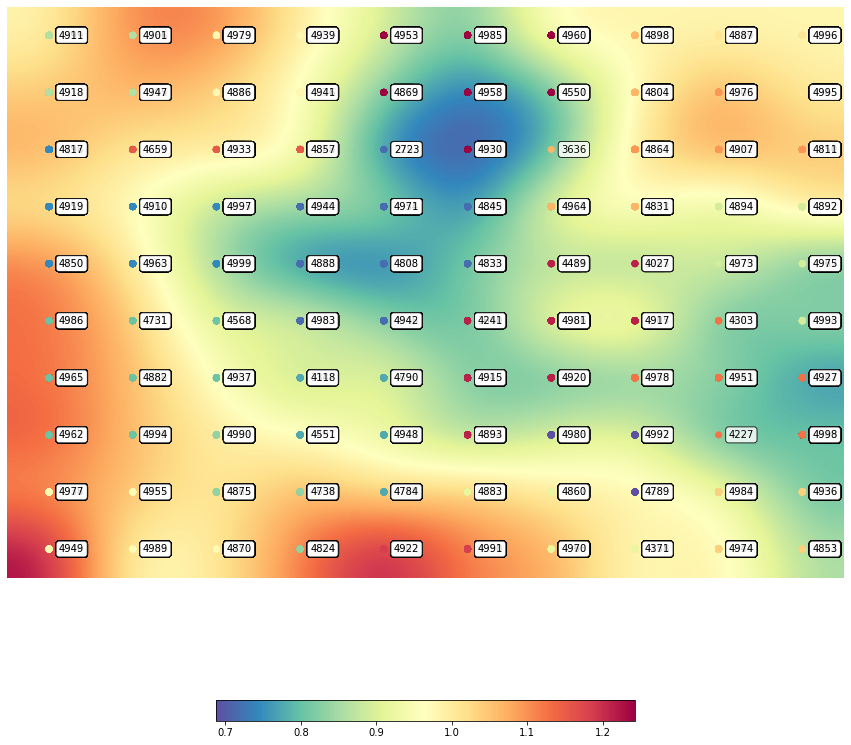

[[ 6  6 10 10 19 19 19 13 11 11]
 [ 6  6 10 10 19 19 19 13 14 11]
 [ 2 16 16 16  1 19 13 14 14 14]
 [ 2  2  2  1  1  1 13 13  7  7]
 [ 2  2  2  1  1  1 18 18  7  7]
 [ 4  4  4  1  1 18 18 18 15  7]
 [ 4  4  4  3  3 18 18 15 15 15]
 [ 4  4  5  3  3 18  0  0 15 15]
 [ 9  9  5  5  3  8  8  0 12 12]
 [ 9  9  9  5 17 17  8  8 12 12]]
Clusters sorted by increasing order of neurons:
[17  0 16 11 14  5  6 12  8 10 13  9  7  3 15  2 19  4 18  1]
[2 3 3 3 4 4 4 4 4 4 5 5 5 5 6 7 7 8 8 9]


In [ ]:
_ = som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15), 
                     labels = range(len(bmus)))
print(som.clusters)

print('Clusters sorted by increasing order of neurons:')
clusts, freqs = np.unique(som.clusters, return_counts=True)
print(np.argsort(freqs))
freqs.sort()
print(freqs)

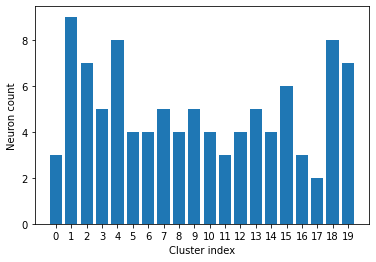

In [ ]:
import collections
import matplotlib.pyplot as plt

s = dict(collections.Counter(som.clusters.flatten()))
idx = sorted(s)

plt.bar(idx, [s[i] for i in idx])
plt.xticks(idx)
plt.xlabel('Cluster index')
plt.ylabel('Neuron count')
plt.show()

### Έπειτα k = 25

In [ ]:
from sklearn.cluster import KMeans

algorithm = KMeans(n_clusters = 25)
som.cluster(algorithm=algorithm)

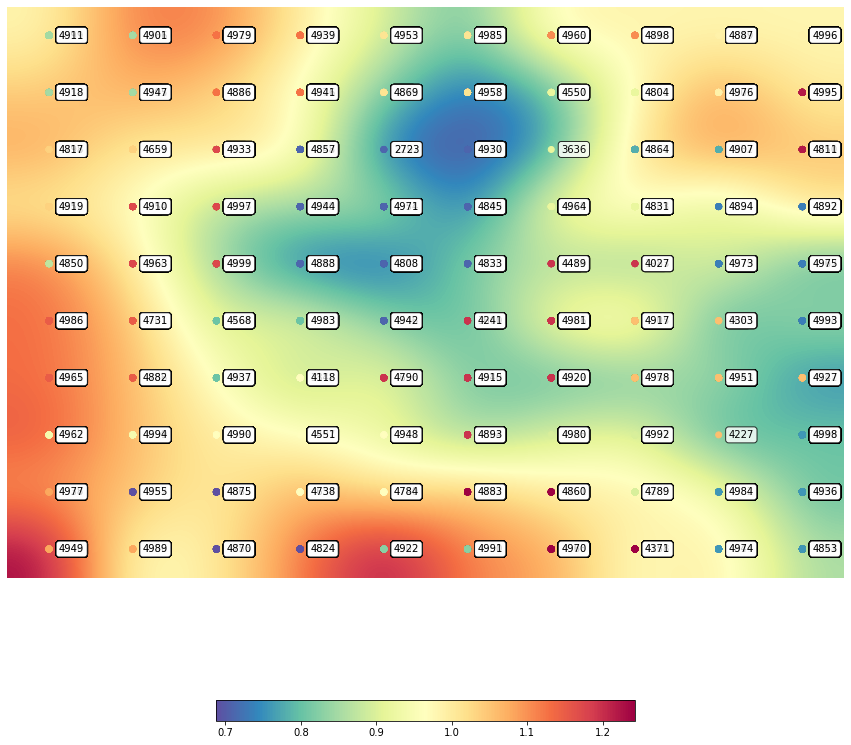

[[ 7  7 19 19 14 14 18 18 13 13]
 [ 7  7 19 19 14 14 10 10 13 23]
 [15 15 21  1  1  1 10  4  4 23]
 [15 21 21  1  1  1 10 10  2  2]
 [ 8 21 21  1  1  1 22 22  2  2]
 [20 20  5  5  1 22 22 16 16  2]
 [20 20  5 12 22 22 22 16 16 16]
 [11 11 12 12 12 22  9  9 16  3]
 [17  0  0 12 12 24 24  9  3  3]
 [17 17  0  0  6  6 24 24  3  3]]
Clusters sorted by increasing order of neurons:
[ 8 18  4  6 11 23  5 17  9 15 13  0 20 19 24  7 14 10  3  2 21 16 12 22
  1]
[ 1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  6  6  8
 10]


In [ ]:
_ = som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15), 
                     labels = range(len(bmus)))
print(som.clusters)

print('Clusters sorted by increasing order of neurons:')
clusts, freqs = np.unique(som.clusters, return_counts=True)
print(np.argsort(freqs))
freqs.sort()
print(freqs)

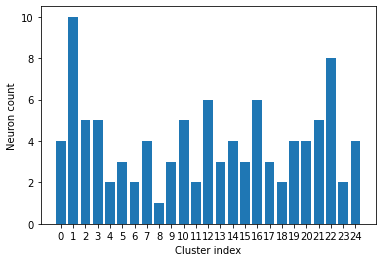

In [ ]:
import collections
s = dict(collections.Counter(som.clusters.flatten()))
idx = sorted(s)

plt.bar(idx, [s[i] for i in idx])
plt.xticks(idx)
plt.xlabel('Cluster index')
plt.ylabel('Neuron count')
plt.show()

### Και k = 30

In [ ]:
from sklearn.cluster import KMeans

algorithm = KMeans(n_clusters = 30)
som.cluster(algorithm=algorithm)

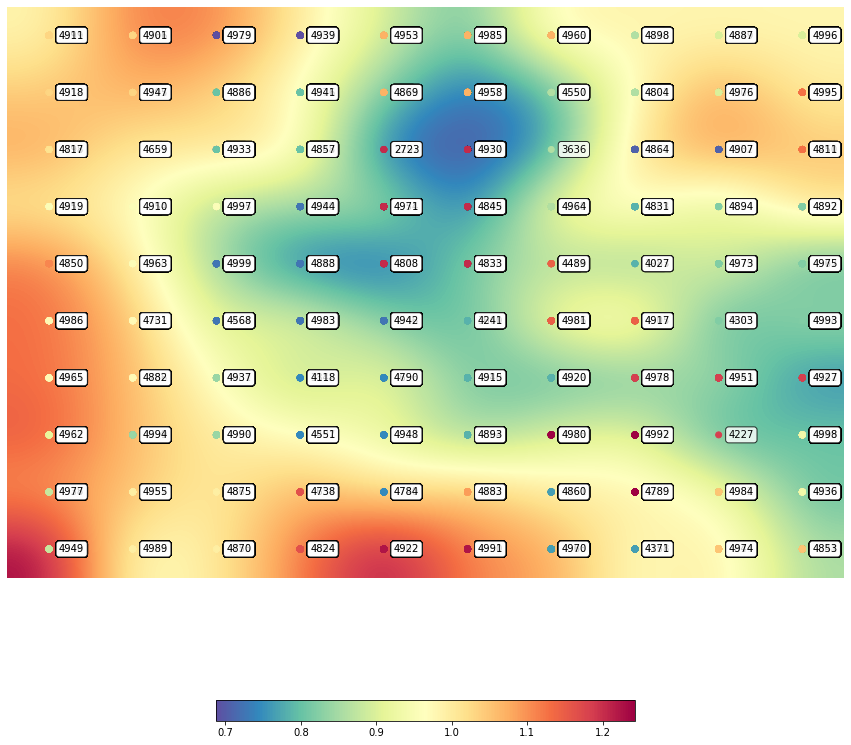

[[18 18  0  0 20 20 20  9 11 11]
 [18 18  6  6 20 20  9  9 11 23]
 [17 17  6  6 27 27  9  1  1 23]
 [14 14 14  2 27 27  9  5  7  7]
 [22 14  2  2 27 27 24  5  7  7]
 [15 15  2  2  2  5 24 24  7  7]
 [15 15  8  3  3  5  5 26 26 26]
 [12  8  8  3  3  5 29 29 26 13]
 [10 16 16 25  3 21  4 29 19 13]
 [10 16 16 25 28 28  4  4 19 19]]
Clusters sorted by increasing order of neurons:
[22 21 12  0  1 25 23 17 28 10 13 24 19 29  8  4 11 15 16 18  6 26 14  9
 20  3  7  5  2 27]
[1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 6 6 6 6]


In [ ]:
_ = som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15), 
                     labels = range(len(bmus)))
print(som.clusters)

print('Clusters sorted by increasing order of neurons:')
clusts, freqs = np.unique(som.clusters, return_counts=True)
print(np.argsort(freqs))
freqs.sort()
print(freqs)

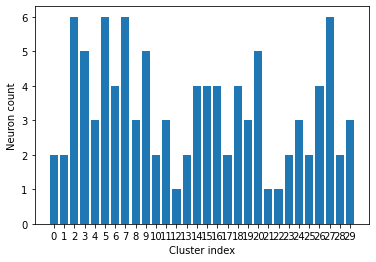

In [ ]:
import collections
s = dict(collections.Counter(som.clusters.flatten()))
idx = sorted(s)

plt.bar(idx, [s[i] for i in idx])
plt.xticks(idx)
plt.xlabel('Cluster index')
plt.ylabel('Neuron count')
plt.show()


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. 

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [ ]:
def measure_category_distribution(movies): 
    category_counts = {}
    for movie in movies:
        for cat in categories[movie][0].replace('"', '').split(',  '):
            if cat in category_counts:
                category_counts[cat] += 1
            else:
                category_counts[cat] = 1
    
    return category_counts

In [ ]:
def print_categories_stats(movie_ids):
  categs=[]
  for i in movie_ids:
    categs.extend(categories[i][0][1:-1].split('",  "'))
  print(categs)
  categs1, freqs = np.unique(categs, return_counts=True)
  for i in np.argsort(freqs):
    print(categs1[i])
  freqs.sort()
  print(freqs)

In [ ]:
def print_cluster_neurons_movies_report(cluster):
    y, x = np.nonzero(som.clusters == cluster)
    cat_counts = {}
    for neuron in zip(x, y):
        movies = np.nonzero((som.bmus == neuron).sum(axis = 1) == 2)[0]
        c = measure_category_distribution(movies)
        for k in c:
            if k not in cat_counts:
                cat_counts[k] = c[k]
            else:
                cat_counts[k] += c[k]
        
    
    print(f'Cluster {cluster} statistics:\n======================')
    for lbl, cnt in sorted(cat_counts.items(), key = lambda x: -x[1]):
        print(f'{lbl}: {cnt}')

In [ ]:
def print_cluster_neurons_movies(cluster_id):
  cluster_bmus = np.where(som.clusters==cluster_id)
  cluster_positions = np.column_stack(cluster_bmus)
  cluster_movies = []
  for i in cluster_positions:
    for j in range(ubmus.shape[0]):
      if i[0]==ubmus[j][0] and i[1]==ubmus[j][1]:
        cluster_movies.append(j)
  return cluster_movies

In [ ]:
def neuron_movies_report(cluster):
  neurons = print_cluster_neurons_movies(cluster)
  ind = [indices[i] for i in neurons]
  print_categories_stats(ind)


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.


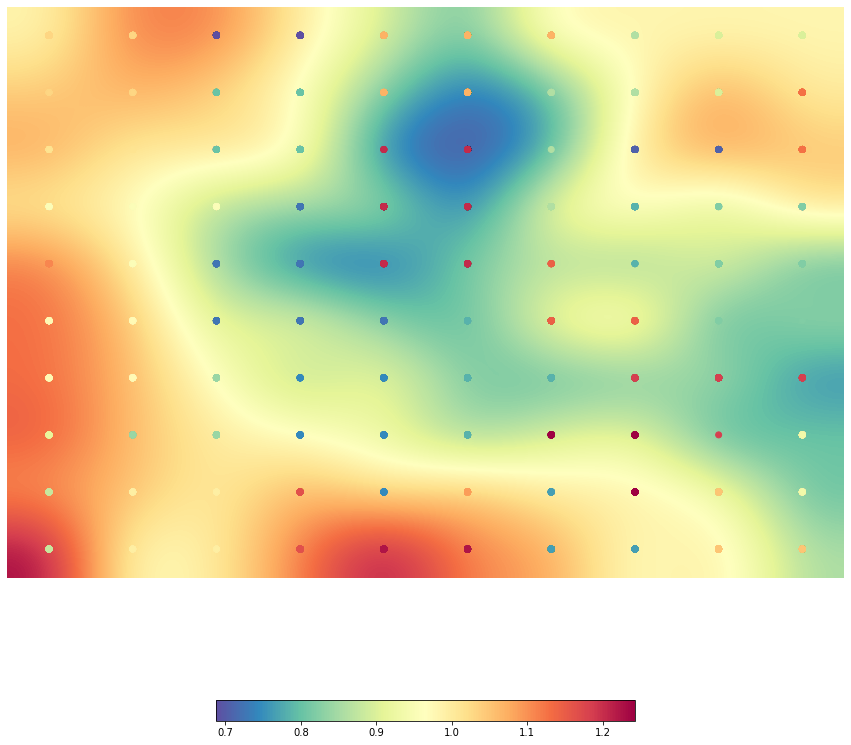

[[18 18  0  0 20 20 20  9 11 11]
 [18 18  6  6 20 20  9  9 11 23]
 [17 17  6  6 27 27  9  1  1 23]
 [14 14 14  2 27 27  9  5  7  7]
 [22 14  2  2 27 27 24  5  7  7]
 [15 15  2  2  2  5 24 24  7  7]
 [15 15  8  3  3  5  5 26 26 26]
 [12  8  8  3  3  5 29 29 26 13]
 [10 16 16 25  3 21  4 29 19 13]
 [10 16 16 25 28 28  4  4 19 19]]
Clusters sorted by increasing order of neurons:
[22 21 12  0  1 25 23 17 28 10 13 24 19 29  8  4 11 15 16 18  6 26 14  9
 20  3  7  5  2 27]
[1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 6 6 6 6]


In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))
print(som.clusters)
print('Clusters sorted by increasing order of neurons:')
clusts, freqs = np.unique(som.clusters, return_counts=True)
print(np.argsort(freqs))
freqs.sort()
print(freqs)



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.


Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


In [ ]:
neuron_movies_report(2)
neuron_movies_report(21)

['Comedy', 'Parody', 'Absurdism', 'Sports', 'Gross-out film', 'Comedy', 'Gross out', 'Slapstick', 'Animation', 'Comedy', 'Comedy', 'Biography', 'World cinema', 'Musical', 'Drama', 'Romantic drama', 'Music', 'Romance Film']
Absurdism
Animation
Biography
Drama
Gross out
Gross-out film
Music
Musical
Parody
Romance Film
Romantic drama
Slapstick
Sports
World cinema
Comedy
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 4]
['World cinema', 'Action/Adventure', 'Martial Arts Film', 'Drama', 'Comedy', 'Chinese Movies']
Action/Adventure
Chinese Movies
Comedy
Drama
Martial Arts Film
World cinema
[1 1 1 1 1 1]


In [ ]:
def find_unique_bmus_per_genre(genre):
    genre_bmus_set = set()
    
    for movie in range(len(final_set)):
        if f'"{genre}"' in categories[movie][0]:
            genre_bmus_set.add(tuple(som.bmus[movie]))
    
    print(genre + ': ', end = '')
    return genre_bmus_set

In [ ]:
cats = measure_category_distribution(list(range(len(final_set))))
sorted(cats.items(), key = lambda x: -x[1])

[('Drama', 2301),
 ('Comedy', 1224),
 ('Romance Film', 818),
 ('Thriller', 774),
 ('Action', 695),
 ('World cinema', 610),
 ('Crime Fiction', 541),
 ('Horror', 505),
 ('Black-and-white', 444),
 ('Indie', 423),
 ('Short Film', 420),
 ('Action/Adventure', 415),
 ('Adventure', 401),
 ('Family Film', 399),
 ('Romantic drama', 339),
 ('Musical', 313),
 ('Animation', 292),
 ('Science Fiction', 275),
 ('Mystery', 254),
 ('Romantic comedy', 248),
 ('Fantasy', 230),
 ('Comedy film', 218),
 ('Crime Thriller', 198),
 ('War film', 189),
 ('Period piece', 163),
 ('Documentary', 154),
 ('Silent film', 151),
 ('Film adaptation', 138),
 ('Bollywood', 137),
 ('Japanese Movies', 137),
 ('Psychological thriller', 130),
 ('Comedy-drama', 129),
 ('Western', 120),
 ('Chinese Movies', 108),
 ("Children's/Family", 101),
 ('Family Drama', 94),
 ('Sports', 89),
 ('Television movie', 87),
 ('Martial Arts Film', 86),
 ('Parody', 84),
 ('Black comedy', 82),
 ('Slasher', 82),
 ('Coming of age', 78),
 ('Slapstick', 

In [ ]:
print(len(find_unique_bmus_per_genre('Drama')))
print(len(find_unique_bmus_per_genre('Comedy')))
print(len(find_unique_bmus_per_genre('Fantasy')))
print(len(find_unique_bmus_per_genre('Sports')))
print(len(find_unique_bmus_per_genre('Film noir')))

Drama: 69
Comedy: 67
Fantasy: 54
Sports: 43
Film noir: 20


### Εδώ ορίζεται η συνάρτηση num_of_neurons_for_category η οποία μετρά τον αριθμό των neurons που εμφανίζεται ως dominant (ανάμεσα στις 3 μεγαλύτερες πληθικότητες) μία κατηγορία. Όπως αναμένουμε η κατηγορίες Drama και Comedy που εφανίζονται πολύ στο dataset, κυριαρχούν σε πολλούς νευρώνες με το drama να είναι η πιο dominant.

In [ ]:
def num_of_neurons_for_category(Category):
    num_of_neurons = 0
    for neuron in range(30 * 30):
        list_of_movies = list(np.where(indices==neuron))
        total_categories = []
        for item in list_of_movies[0].tolist():
            categs = categories[item][0] 
            categs = categs.split(',')
            for number_of_categs in categs:
                number_of_categs = number_of_categs.strip(' ')
                number_of_categs = number_of_categs.strip('"')
                total_categories.append(number_of_categs)
        total_categories = np.unique(total_categories,return_counts=True)
        inds = np.argsort(total_categories[1])[::-1]
        
        for i in range(min(3,len(inds))):
            index = inds[i]
            if(total_categories[0][index] == Category):
                num_of_neurons += 1
    print("Category",Category,"was found in",num_of_neurons, "neurons.")

In [ ]:
for category in ['Comedy','Drama','Action','Science Fiction','Musical','Black-and-white',"Bollywood","Computer Animation","Horror"]:
    num_of_neurons_for_category(category)

Category Comedy was found in 20 neurons.
Category Drama was found in 47 neurons.
Category Action was found in 15 neurons.
Category Science Fiction was found in 7 neurons.
Category Musical was found in 8 neurons.
Category Black-and-white was found in 12 neurons.
Category Bollywood was found in 1 neurons.
Category Computer Animation was found in 0 neurons.
Category Horror was found in 10 neurons.


### Τώρα για τα μακρινά πρότυπα εισόδου θα μελετήσουμε δυο ταινίες που να έχουν BMU σε μακρινούς clusters.

In [ ]:
print(categories[4995])
print(categories[4987])

['"Thriller",  "Action/Adventure",  "Action",  "Martial Arts Film",  "Japanese Movies"']
['"Short Film",  "Comedy film",  "Drama"']


In [ ]:
print_cluster_neurons_movies_report(0)
print_cluster_neurons_movies_report(14)

Cluster 0 statistics:
Romantic drama: 167
Romance Film: 167
Drama: 166
World cinema: 54
Period piece: 41
Film adaptation: 28
Indie: 23
Costume drama: 14
Black-and-white: 14
Musical: 12
War film: 11
Biographical film: 11
Television movie: 9
Crime Fiction: 8
Biography: 8
Melodrama: 7
Biopic [feature]: 7
Action/Adventure: 7
Comedy-drama: 6
Fantasy: 6
Family Drama: 6
Chinese Movies: 6
Thriller: 5
Action: 5
Comedy: 5
Epic: 5
Tragedy: 5
Mystery: 4
Christian film: 4
Western: 4
Marriage Drama: 4
Filipino Movies: 4
Road movie: 4
Art film: 4
Musical Drama: 3
Ensemble Film: 3
Coming of age: 3
Slice of life story: 3
Silent film: 3
Spy: 3
Political drama: 3
Music: 3
Japanese Movies: 3
Gangster Film: 2
Adventure: 2
Sports: 2
Fantasy Drama: 2
Historical fiction: 2
Inspirational Drama: 2
Horror: 2
Romantic fantasy: 2
Teen: 2
Roadshow theatrical release: 2
Crime Drama: 2
Courtroom Drama: 2
Erotic Drama: 2
Bollywood: 2
Costume Adventure: 1
Kitchen sink realism: 1
British New Wave: 1
Childhood Drama: 1
P

### Παρακάτω ορίζεται η συνάρτηση plot_neurons_for_2_categories η οποία υπολογίζει τους neurons που ανήκουν σε μία από 2 κατηγορίες και με scatter plot παρουσιάζει την τοπολογία των 2 κατηγοριών.

In [ ]:
import matplotlib.pyplot as plt

def plot_neurons_for_2_categories(Category1,Category2):
    num_of_neurons = 0
    categ_1_x = []
    categ_1_y = []
    categ_2_x = []
    categ_2_y = []
    for neuron in range(30 * 30):
        list_of_movies = list(np.where(indices==neuron))
        total_categories = []
        for item in list_of_movies[0].tolist():
            categs = categories[item][0] 
            categs = categs.split(',')
            for number_of_categs in categs:
                number_of_categs = number_of_categs.strip(' ')
                number_of_categs = number_of_categs.strip('"')
                total_categories.append(number_of_categs)
        total_categories = np.unique(total_categories,return_counts=True)
        inds = np.argsort(total_categories[1])[::-1]
        
        for i in range(min(3,len(inds))):
            index = inds[i]
            if(total_categories[0][index] == Category1):
                [x,y] = list(ubmus[neuron])
                categ_1_x.append(x)
                categ_1_y.append(y)
            if(total_categories[0][index] == Category2):
                [x,y] = list(ubmus[neuron])
                categ_2_x.append(x)
                categ_2_y.append(y)
    plt.scatter(categ_1_x, categ_1_y, label = Category1, color = 'r', alpha = .3)
    plt.scatter(categ_2_x, categ_2_y, label = Category2, color = 'b', alpha = .3)
    plt.legend(loc = 'best')
    plt.title("Topology of Neurons for 2 Categories")
    plt.show()
    return

### Έπειτα δοκιμάζουμε δίαφορες κατηγορίες μεταξύ τους.

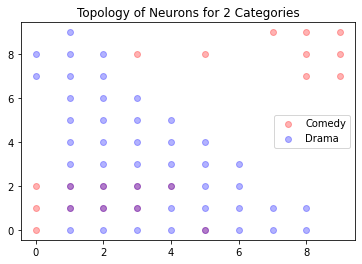

In [ ]:
plot_neurons_for_2_categories('Comedy','Drama')

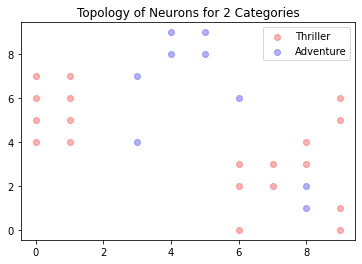

In [ ]:
plot_neurons_for_2_categories('Thriller','Adventure')

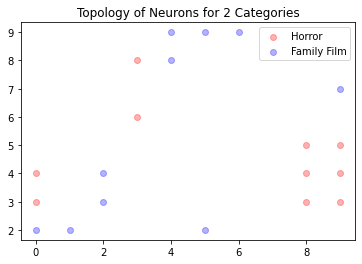

In [ ]:
plot_neurons_for_2_categories('Horror','Family Film')

### Οι κατηγορίες που επιλέξαμε είναι αντικρουόμενες και αυτό επιβεβαιώνεται καθώς κατέχουν αντιδιαμετρικές θέσεις, κατά κύριο λόγο, στον χάρτη.

### Τέλος εξετάζουμε παρεμφερείς (ως προς το θέμα) κατηγορίες.

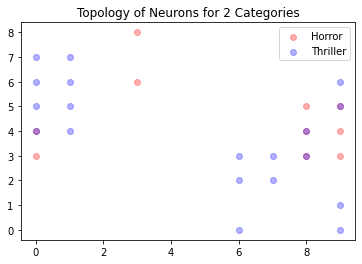

In [ ]:
plot_neurons_for_2_categories("Horror","Thriller")

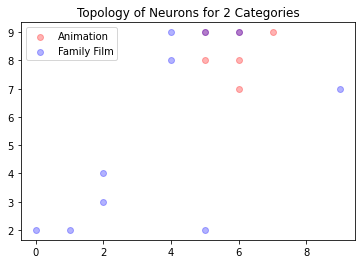

In [ ]:
plot_neurons_for_2_categories("Animation", "Family Film")

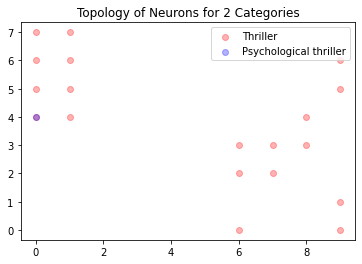

In [ ]:
plot_neurons_for_2_categories("Thriller", 'Psychological thriller')

### Παρατηρήσεις :
### Αρχικά αναφέρουμε πως δοκιμάστηκαν και χάρτες με μεγέθη 25*25 και 30*30 αλλά δεν παρήγαγαν κάποιο αποτέλεσμα άξιο αναφοράς. Επιπλέον παραπάνω μέσω παραδειγμάτων αποδείχτηκαν και οι 3 ιδιότητες του SOM που αναφέρει η εκφώνηση.



### Βλέπουμε ότι οι κατηγορίες που εμφανίζονται πιο συχνά στο συνολικό σύνολο δεδομένων, εμφανίζονται και σε περισσότερους νευρώνες σαν top κατηγορία. Αυτό μας δείχνει ότι οι κατηγορίες που είναι οι πιο συχνές γενικά, είναι και εξαιρετικά συχνές στους νευρώνες. Ακόμα, είναι εμφανές ότι όσο μια κατηγορία είναι λιγότερο συχνή στα δεδομένα, είναι και λιγότερο συχνή στους νευρώνες.

### Clusters άξια αναφοράς ήταν το cluster 1 καθώς συγκέντρωνε ταινίες action και το cluster 4 όπου συγκέντρωνε short films και animations.


### Πιθανές ερμηνείες για τυχόν διαφοροποιήσεις από το θεωρητικά αναμενόμενο clustering είναι πως ενώ κάποια ταινία έχει ως κύριο categorie π.χ drama και μια άλλη πχ horror, οι υπόλοιπες κατηγορίες μετατοπίζουν τα clusters και έτσι κάποιες ταινίες βρίσκονται κοντά με κάποιες που φαινομενικά δεν θα έπρεπε, λόγω των υπολοίπων κατηγοριών που λαμβάνει υπόψιν ο αλγόριθμος του clustering. Μια άλλη εξήγηση είναι οτι προσπαθούμε να "απλώσουμε" ενα δισδιάστο "πέπλο" σε έναν χώρο εξαιρετικά πολλών διαστάσεων. Αυτό έχει ως αποτέλεσμα να μην μπορούμε επακριβώς να κάνουμε καλή τοπολογική προσέγγιση των δεδομένων, καθώς η μείωση των διαστάσεων είναι απλά παρα πολυ μεγάλη, και ως συνέπεια χάνεται πάρα πολύ τοπολογική πληροφορία. 

### Επιπλέον πολλά είδη υπόκεινται σε άλλα μεγαλύτερα είδη (πχ Family drama) με αποτέλεσμα να μην μπορούμε να πετύχουμε 100% νοηματική συνάφεια μεταξύ όλων των ταινιών.


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

### Σημείωση για το παραδοτέο : Κάποια κελιά που προυπήρχαν στην εκφώνηση διαγράφηκαν καθώς θέλαμε να μειώσουμε το μέγεθος του notebook. Κρατήθηκαν αυτά με τις περισσότερο χρήσιμες πληροφορίες.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>